## Final Project Submission

Please fill out:
* Student name: Rachel Edwards, Svitlana Glibova
* Student pace: full time
* Scheduled project review date/time: 2/12/2021, 5:00 PM PST
* Instructor name: Max Barry

## Table of Contents
1. [Import Statements](#Import-Statements)
2. [EDA](#EDA)
3. [FSM Ternary](#FSM-Ternary)
4. [Data Cleaning](#Data-Cleaning)
4. [Ternary to Binary](#Ternary-to-Binary)
5. [Binary EDA](#Binary-EDA)
6. [Folium EDA](#Folium-EDA)
7. [Models](#Models)
8. [GridSearch Tuning](#GridSearch-Tuning)
9. [Binary FSM](#Binary-FSM)
10. [Vanilla Models](#Vanilla-Models)
11. [Tuned Models](#Tuned-Models)
12. [Test Set](#Test-Set)

# Import Statments

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

# plot_confusion_matrix is a handy visual tool, added in the latest version of scikit-learn
# if you are running an older version, comment out this line and just use confusion_matrix
from sklearn.metrics import plot_confusion_matrix, precision_score, recall_score, accuracy_score, f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix

from sklearn.dummy import DummyClassifier
from sklearn import svm
from xgboost import XGBClassifier
#from imblearn.over_sampling import SMOTE
#from imblearn.pipeline import Pipeline
import folium

from statsmodels.graphics.mosaicplot import mosaic

import warnings
warnings.filterwarnings('ignore')

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df_target = pd.read_csv('data/tanzania_target.csv')

In [3]:
df_train = pd.read_csv('data/tanzania_training.csv')

# EDA

In [4]:
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
target_list= df_target.status_group.tolist()

In [6]:
df_train['target'] = target_list

In [7]:
df_target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [8]:
df_train.corr()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
id,1.000000,-0.005321,-0.004692,-0.001348,0.001718,-0.002629,-0.003028,-0.003044,-0.002813,-0.002082
amount_tsh,-0.005321,1.000000,0.076650,0.022134,-0.052670,0.002944,-0.026813,-0.023599,0.016288,0.067915
gps_height,-0.004692,0.076650,1.000000,0.149155,-0.035751,0.007237,-0.183521,-0.171233,0.135003,0.658727
longitude,-0.001348,0.022134,0.149155,1.000000,-0.425802,0.023873,0.034197,0.151398,0.086590,0.396732
latitude,0.001718,-0.052670,-0.035751,-0.425802,1.000000,0.006837,-0.221018,-0.201020,-0.022152,-0.245278
num_private,-0.002629,0.002944,0.007237,0.023873,0.006837,1.000000,-0.020377,-0.004478,0.003818,0.026056
region_code,-0.003028,-0.026813,-0.183521,0.034197,-0.221018,-0.020377,1.000000,0.678602,0.094088,0.031724
district_code,-0.003044,-0.023599,-0.171233,0.151398,-0.201020,-0.004478,0.678602,1.000000,0.061831,0.048315
population,-0.002813,0.016288,0.135003,0.086590,-0.022152,0.003818,0.094088,0.061831,1.000000,0.260910
construction_year,-0.002082,0.067915,0.658727,0.396732,-0.245278,0.026056,0.031724,0.048315,0.260910,1.000000


In [9]:
df_train.dtypes
#31 objs, 8 ints

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment                   object
payment_ty

In [10]:
df_train.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [11]:
df_train.isna().sum()
#scheme_management         3877
#scheme_name              28166
#permit                    3056
#public_meeting            3334
#subvillage                 371
#installer                 3655
#funder                    3635
#consider dropping scheme_name
#some kind of connection between funder and installer

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [12]:
df_target.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [13]:
numeric_columns = ["amount_tsh", "gps_height", "longitude", "latitude", "num_private", "region_code", 
                   "district_code", "population", "construction_year"]

# FSM Ternary

In [14]:
dummy_model = DummyClassifier(strategy="most_frequent")
#dummy model that will pick the largest class

In [15]:
numeric_df = df_train[numeric_columns]
X = numeric_df.drop("num_private", axis=1)
y = df_target["status_group"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2021)
#just using numeric columns as features

In [16]:
dummy_model.fit(X_train, y_train)

DummyClassifier(strategy='most_frequent')

In [17]:
dummy_model.predict(X_train)

array(['functional', 'functional', 'functional', ..., 'functional',
       'functional', 'functional'], dtype='<U10')

In [18]:
cross_val_score(dummy_model, X_train, y_train, cv=3)
#score of about 54%
#terrible

array([0.54255892, 0.54249158, 0.54249158])

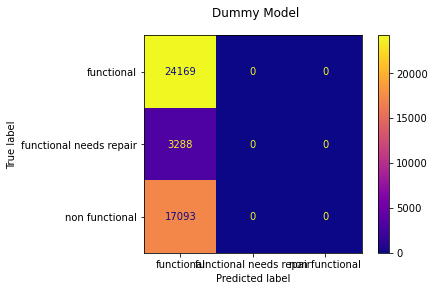

In [19]:
fig, ax = plt.subplots()

fig.suptitle("Dummy Model")

plot_confusion_matrix(dummy_model, X_train, y_train, ax=ax, cmap="plasma");

In [20]:
#next steps:

#use missing indicator:
#impute:
#scheme_management         3877
#scheme_name              28166
#permit                    3056
#public_meeting            3334
#subvillage                 371
#installer                 3655
#funder                    3635

#drop:
#wpt_name:name of the water point
#num_private: isn't given a description
#recorded_by: group that recorded data
#scheme_name: missing more than half its rows
# date recorded

#one hot encode all categorical values

#scale features

# work with either quantity or quantity group
#work with  quality group
#keep waterpoint_type
#keep source class and source 
#keep payment type
#keep management and management group
#extraction class and extraction type
#get rid of scheme name
#get rid of num_private
#drop subvillage
#drop date_recorded
#drop rows for na for funder and installer
#drop wpt_name
#df_clean = df_train.drop(['quantity'], , axis = 1)

# Data Cleaning

In [21]:
to_drop = ['date_recorded',  
'installer',
'wpt_name',  
'subvillage',  
'recorded_by',  
'scheme_name',  
'extraction_type_group',  
'payment',  
'water_quality',  
'quantity',  
'source_type',  
'waterpoint_type_group',
'num_private',
'region',
'ward',
'id',
'public_meeting'           
]
df_clean = df_train.drop(to_drop, axis = 1)
#drop columns we will not be using

In [22]:
pd.set_option('display.max_columns', None)
df_clean.head(5)

,amount_tsh,funder,gps_height,longitude,latitude,basin,region_code,district_code,lga,population,scheme_management,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment_type,quality_group,quantity_group,source,source_class,waterpoint_type,target
0,6000.0,Roman,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,109,VWC,False,1999,gravity,gravity,vwc,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
1,0.0,Grumeti,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,280,Other,True,2010,gravity,gravity,wug,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,25.0,Lottery Club,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,250,VWC,True,2009,gravity,gravity,vwc,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,functional
3,0.0,Unicef,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,58,VWC,True,1986,submersible,submersible,vwc,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional
4,0.0,Action In A,0,31.130847,-1.825359,Lake Victoria,18,1,Karagwe,0,NaN,True,0,gravity,gravity,other,other,never pay,good,seasonal,rainwater harvesting,surface,communal standpipe,functional


In [23]:
df_clean.shape
#(59400, 24)
#amount_tsh, gps_height, longitude, latitude, population

(59400, 24)

In [24]:
col_names = df_clean.columns
cat = [ 'funder', 'basin',
       'region_code', 'district_code', 'lga',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_class', 'management', 'management_group',
       'payment_type', 'quality_group', 'quantity_group', 'source',
       'source_class', 'waterpoint_type']

In [25]:
df_clean.dropna(inplace=True)
#get rid of NaN rows

In [26]:
df_clean.shape
#(51329, 24)

(51329, 24)

In [27]:
df_clean.isna().sum()

amount_tsh               0
funder                   0
gps_height               0
longitude                0
latitude                 0
basin                    0
region_code              0
district_code            0
lga                      0
population               0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_class    0
management               0
management_group         0
payment_type             0
quality_group            0
quantity_group           0
source                   0
source_class             0
waterpoint_type          0
target                   0
dtype: int64

# Ternary to Binary

In [28]:
df_clean.target.value_counts()
#functional                 32259
#non functional             22824
#functional needs repair     4317-

#Check types nad counts of target

functional                 28076
non functional             19626
functional needs repair     3627
Name: target, dtype: int64

In [29]:
df_clean.head()

,amount_tsh,funder,gps_height,longitude,latitude,basin,region_code,district_code,lga,population,scheme_management,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment_type,quality_group,quantity_group,source,source_class,waterpoint_type,target
0,6000.0,Roman,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,109,VWC,False,1999,gravity,gravity,vwc,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
1,0.0,Grumeti,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,280,Other,True,2010,gravity,gravity,wug,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,25.0,Lottery Club,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,250,VWC,True,2009,gravity,gravity,vwc,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,functional
3,0.0,Unicef,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,58,VWC,True,1986,submersible,submersible,vwc,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional
5,20.0,Mkinga Distric Coun,0,39.172796,-4.765587,Pangani,4,8,Mkinga,1,VWC,True,2009,submersible,submersible,vwc,user-group,per bucket,salty,enough,other,unknown,communal standpipe multiple,functional


In [30]:
target_list = df_clean.target.tolist()

In [31]:
t_list = ['non functional' if i=='functional needs repair' else i for i in target_list]
#conver all functional needs repair tags to simply non functional tocreate a binary target

In [32]:
df_clean['bi_target'] = t_list

In [33]:
df_clean.head()

,amount_tsh,funder,gps_height,longitude,latitude,basin,region_code,district_code,lga,population,scheme_management,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment_type,quality_group,quantity_group,source,source_class,waterpoint_type,target,bi_target
0,6000.0,Roman,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,109,VWC,False,1999,gravity,gravity,vwc,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional,functional
1,0.0,Grumeti,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,280,Other,True,2010,gravity,gravity,wug,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional,functional
2,25.0,Lottery Club,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,250,VWC,True,2009,gravity,gravity,vwc,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,functional,functional
3,0.0,Unicef,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,58,VWC,True,1986,submersible,submersible,vwc,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional,non functional
5,20.0,Mkinga Distric Coun,0,39.172796,-4.765587,Pangani,4,8,Mkinga,1,VWC,True,2009,submersible,submersible,vwc,user-group,per bucket,salty,enough,other,unknown,communal standpipe multiple,functional,functional


In [34]:
df_clean = df_clean.drop(['target'], axis = 1)

In [35]:
df_clean.head()

,amount_tsh,funder,gps_height,longitude,latitude,basin,region_code,district_code,lga,population,scheme_management,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment_type,quality_group,quantity_group,source,source_class,waterpoint_type,bi_target
0,6000.0,Roman,1390,34.938093,-9.856322,Lake Nyasa,11,5,Ludewa,109,VWC,False,1999,gravity,gravity,vwc,user-group,annually,good,enough,spring,groundwater,communal standpipe,functional
1,0.0,Grumeti,1399,34.698766,-2.147466,Lake Victoria,20,2,Serengeti,280,Other,True,2010,gravity,gravity,wug,user-group,never pay,good,insufficient,rainwater harvesting,surface,communal standpipe,functional
2,25.0,Lottery Club,686,37.460664,-3.821329,Pangani,21,4,Simanjiro,250,VWC,True,2009,gravity,gravity,vwc,user-group,per bucket,good,enough,dam,surface,communal standpipe multiple,functional
3,0.0,Unicef,263,38.486161,-11.155298,Ruvuma / Southern Coast,90,63,Nanyumbu,58,VWC,True,1986,submersible,submersible,vwc,user-group,never pay,good,dry,machine dbh,groundwater,communal standpipe multiple,non functional
5,20.0,Mkinga Distric Coun,0,39.172796,-4.765587,Pangani,4,8,Mkinga,1,VWC,True,2009,submersible,submersible,vwc,user-group,per bucket,salty,enough,other,unknown,communal standpipe multiple,functional


In [36]:
df_combo = df_clean[['region_code', 'scheme_management', 'quality_group', 
                    'quantity_group', 'source', 'extraction_type_class', 'waterpoint_type', 'bi_target']]
df_num = df_clean[['amount_tsh', 'construction_year', 'latitude', 'longitude']]
df_completed = df_num.join(df_combo, how='outer')
df_completed.shape
#(51329, 12)

(51329, 12)

# Binary EDA

<AxesSubplot:xlabel='bi_target', ylabel='amount_tsh'>

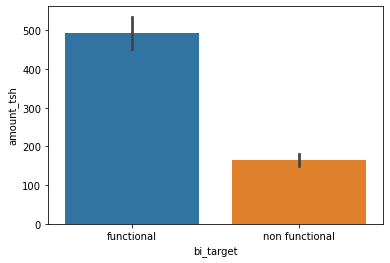

In [37]:
sns.barplot(data=df_clean, x="bi_target", y="amount_tsh")
#correlation between functional pumps and the amount of total static head
#the higher the TSH the moe likely a pump is to be functional

<function matplotlib.pyplot.show(close=None, block=None)>

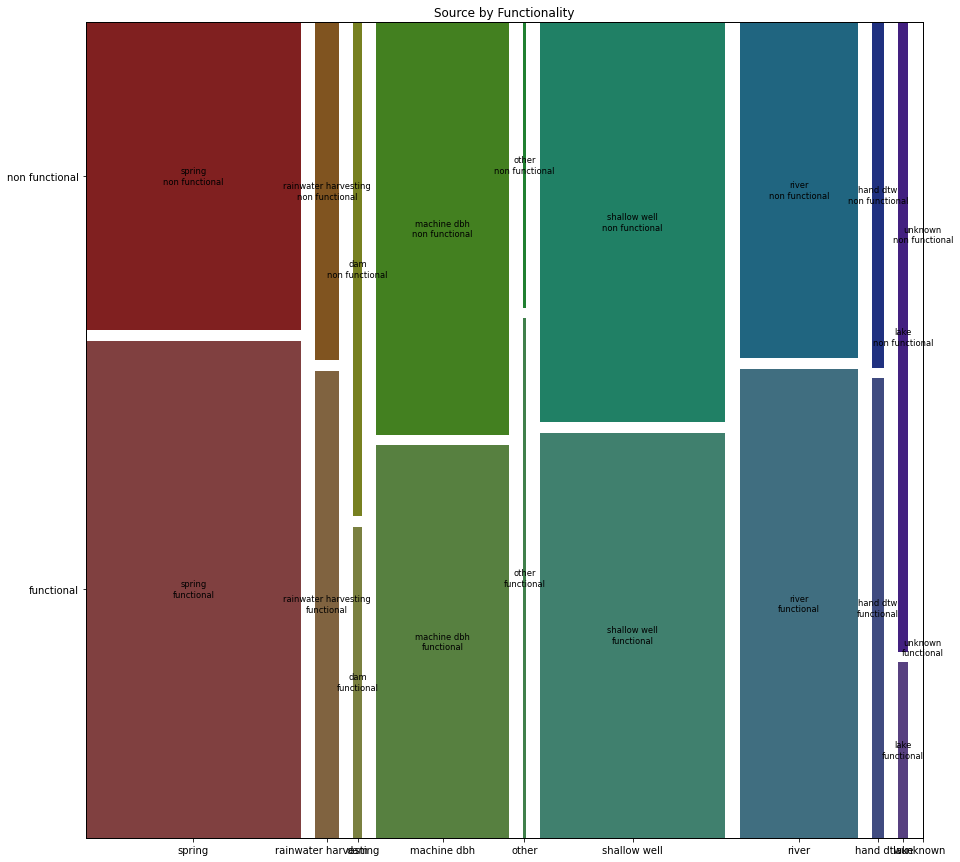

In [38]:
fig, ax = plt.subplots(figsize = (15,15))
mosaic(df_clean, ['source', 'bi_target'], gap = 0.02, ax =ax, title='Source by Functionality')
plt.show
#mosaic plot of categorical data between source and funcctionality
#spring and river appear to have a positive correlation with functional

In [39]:
df_clean.head()
df_basin_pop = df_clean[['basin', 'population', 'bi_target']]
#subset for just columns being used

In [40]:
df_pop_map = df_basin_pop.groupby(['basin']).sum()
df_pop_map.head()
#groupby to check the total population associated with each basin

,population
basin,
Internal,1066930
Lake Nyasa,294052
Lake Rukwa,394352
Lake Tanganyika,1674470
Lake Victoria,789684


Text(0.5, 1.0, 'Population Per Basin')

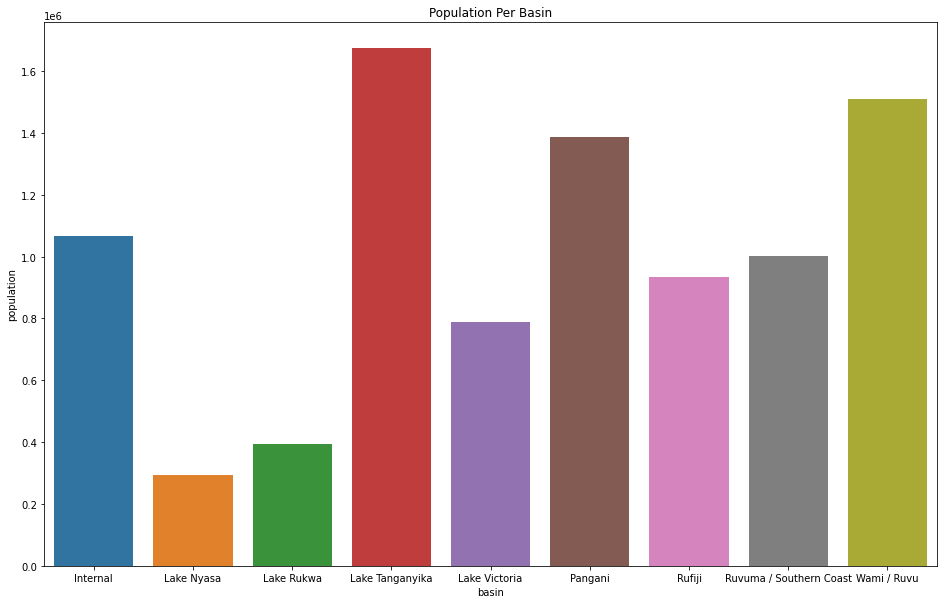

In [41]:
fig, ax = plt.subplots(figsize=(16,10))
sns.barplot(x=df_pop_map.index, y="population", data=df_pop_map, ax =ax).set_title('Population Per Basin')
#plot of each basin and its population

In [42]:
df_basin_target = df_basin_pop.drop('population', axis = 1)
#drop population from data fram

In [43]:
df_basin_target_map = df_basin_target.value_counts()
#check value_counts() for how many functional or non funcitonal water points each basin has
#df_basin_target.groupby([ 'basin']).sum()
df_basin_target_map

basin_name = ['Pangani', 'Lake Victoria', 'Lake Victoria', 'Rufiji', 'Internal', 'Pangani', 'Wami / Ruvu', 'Lake Tanganyika',
              'Wami / Ruvu', 'Lake Tanganyika', 'Internal', 'Lake Nyasa', 'Ruvuma / Southern Coast',
              'Rufiji', 'Ruvuma / Southern Coast', 'Lake Rukwa', 'Lake Nyasa', 'Lake Rukwa']

target_list = ['functional', 'non functional', 'functional', 'functional', 'functional', 'non functional', 'functional'
               , 'non functional', 'non functional', 'functional', 'non functional', 'functional', 'non functional', 
               'non functional', 'functional', 'non functional', 'non functional', 'functional']

count_list = [5160, 4280, 4211, 4033, 3802, 3400, 3116, 3058, 2815, 2792, 2528, 2480, 2462, 2005, 1487, 1440, 1265, 995]

dict = {'basin':basin_name, 'target': target_list, 'count': count_list}
df_b_t_c = pd.DataFrame(dict)
#use information from .value counts to constuct a new dataframe containing
#the number of funcitonal or non functional water points for each basin

In [44]:
df_b_t_c.head()

,basin,target,count
0,Pangani,functional,5160
1,Lake Victoria,non functional,4280
2,Lake Victoria,functional,4211
3,Rufiji,functional,4033
4,Internal,functional,3802


Text(0.5, 1.0, 'Functionaility of Waterpoints by Basin')

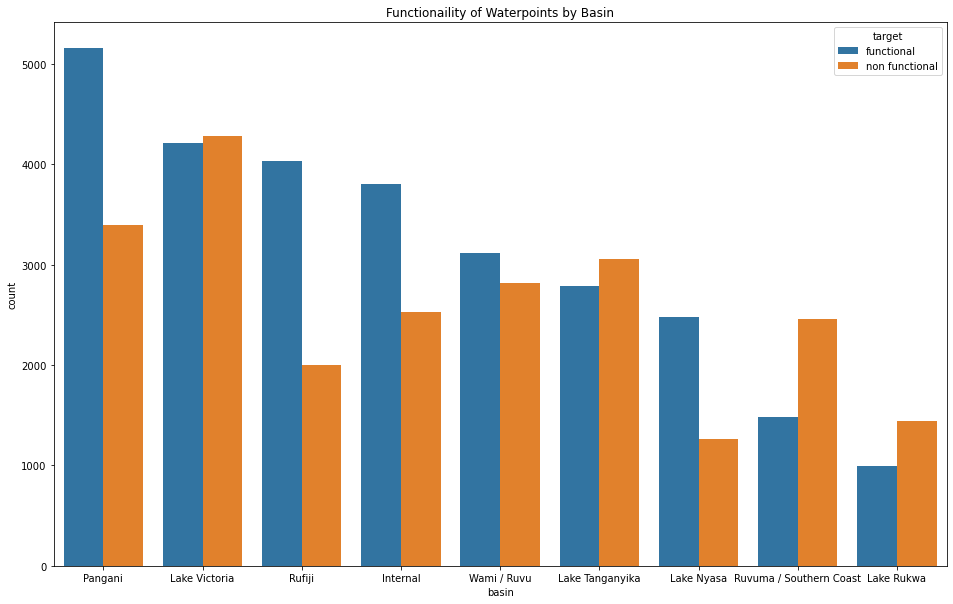

In [45]:
fig, ax = plt.subplots(figsize=(16,10))
sns.barplot(x="basin", y="count", hue="target", data=df_b_t_c, ax = ax).set_title('Functionaility of Waterpoints by Basin')
#plot of how many funcitonal and non functional water points each absin has

# Folium EDA

In [46]:
import folium

In [47]:
df_clean.basin.value_counts()
#cheack how many water points each basin has

Pangani                    8560
Lake Victoria              8491
Internal                   6330
Rufiji                     6038
Wami / Ruvu                5931
Lake Tanganyika            5850
Ruvuma / Southern Coast    3949
Lake Nyasa                 3745
Lake Rukwa                 2435
Name: basin, dtype: int64

In [48]:
df_clean.bi_target.value_counts()
#check target distribution

functional        28076
non functional    23253
Name: bi_target, dtype: int64

In [49]:
def namer(name):
    """takes in a name as a string and returns folium formatted name"""
    named = "<i>" + name +"</i>"
    return named

In [50]:
def basin_mapper():
    
    """Takes no argument and plots all 8 basins on folium map"""
    
    b_map = folium.Map(location=[-6.1630, 35.7516], zoom_start=6, tiles="Stamen Terrain")
    #plots initial space for general area, using tanzania's coordinates
    
    basins = ['Pangani', 'Lake Victoria', 'Lake Nyasa', 'Lake Rukwa', 'Lake Tanganyika',
              'Rufiji', 'Wami / Ruvu', 'Ruvuma / Southern Coast']
    
    long_lat = [[-5.436390, 38.978951], [-0.755775, 33.438354], [-11.6707, 34.6857], [-7.029620, 31.343060], 
                [-6.2556, 29.5108], [-7.773888, 39.363889], [-6.11667, 38.81667], [-10.474445, 34.8888]]
    
    for i in range(0, len(basins)):
        folium.Marker(long_lat[i], namer(basins[i]), icon=folium.Icon(color="purple"), tooltip=tooltip).add_to(b_map)
        #plots a purple marker for each basin
    
    return b_map

In [51]:
def basin_split(bname, df):
    """takes the name of a basin as a string and the cleaned df. 
    Returns pair as a list iwth basin name and basin coords.
    Returns coords_target as a nested list of waterpoint coords and their functionality tag
    """
    tooltip = "Click me!"
    basins = ['Pangani', 'Lake Victoria', 'Lake Nyasa', 'Lake Rukwa', 'Lake Tanganyika',
          'Rufiji', 'Wami / Ruvu', 'Ruvuma / Southern Coast']
    
    long_lat = [[-5.436390, 38.978951], [-0.755775, 33.438354], [-11.6707, 34.6857], [-7.029620, 31.343060], 
                [-6.2556, 29.5108], [-7.773888, 39.363889], [-6.11667, 38.81667], [-10.474445, 34.8888]]
    
    for name in range(0, len(basins)):
        if basins[name] == bname:
            pair = [bname, long_lat[name]]
            #gets the coordinates for the specifed basin only
    
    basin_df = df[['latitude', 'longitude', 'basin', 'bi_target']]

    df_basin = basin_df.loc[basin_df['basin'] == bname]
    
    target = df_basin.bi_target.head(200).tolist()
    long = df_basin.longitude.head(200).tolist()
    lat = df_basin.latitude.head(200).tolist()
    
    coords = [[la,lo] for la,lo in zip(lat, long)]
    #list comp to create lists of water point coordinates, [latitude, longitude]
    coords_target = [[t,c] for t,c in zip(target, coords)]
    #nested list containing [functionality, [latitude, longitude]]
    
    #print(coords[:5])

    return pair, coords_target

In [52]:
def map_build(basin):
    """takes in one parameter that consists of a list with a basin name and its coordinates
    and the coordinates of every water point connected to that basin. Creates a map with a
    marker for the basin and marlers for x amount water points. Builds maps ofindividual basins."""
    
    basin_name = basin[0][0]
    basin_coords = basin[0][1]
    coords = basin[1]
    
    b = folium.Map(location= basin_coords, zoom_start=8, tiles="Stamen Terrain")
    #plots initial space for general area, using specified basin's coordinates
    
    tooltip = "Click me!"
    
    for coord in coords:
        if coord[0] == 'functional':
            folium.Marker(coord[1], "<i>str(i)</i>", icon=folium.Icon(color="green"), tooltip=tooltip).add_to(b)
        else:
            folium.Marker(coord[1], "<i>str(i)</i>", icon=folium.Icon(color="red"), tooltip=tooltip).add_to(b)
            #plots green markers for functional basin and red markers for non functional basins
    
    folium.Marker(basin_coords, namer(basin_name), tooltip=tooltip, icon=folium.Icon(color="purple")).add_to(b)
    #plots purple ,markers for specified basin
        
    return b

In [53]:
basins = ['Pangani', 'Lake Victoria', 'Lake Nyasa', 'Lake Rukwa', 'Lake Tanganyika',
          'Rufiji', 'Wami / Ruvu', 'Ruvuma / Southern Coast']
# to use functioon map_build, a basin name must be picked and passed
#the return value should be saved in a variable and that variable
#must be run in its own cell

In [54]:
bname = basins[0]
Pangani  = map_build(basin_split(bname, df_clean))

In [55]:
bname_list = bname = basins[1]
Lake_Victoria  = map_build(basin_split(bname, df_clean))

In [56]:
bname_list = bname = basins[2]
Lake_Nyasa  = map_build(basin_split(bname, df_clean))

In [57]:
bname_list = bname = basins[3]
Lake_Rukwa = map_build(basin_split(bname, df_clean))

In [58]:
bname_list = bname = basins[4]
Lake_Tanganyika = map_build(basin_split(bname, df_clean))

In [59]:
bname_list = bname = basins[5]
Rufigi = map_build(basin_split(bname, df_clean))

In [60]:
bname_list = bname = basins[6]
wami_ruvu  = map_build(basin_split(bname, df_clean))

In [61]:
bname_list = bname = basins[7]
Ruvuma  = map_build(basin_split(bname, df_clean))

In [62]:
def Full_map(df):
    """Takes in the cleaned data frame and plots all eight basins and however many water points are specified"""
    
    basins = ['Pangani', 'Lake Victoria', 'Lake Nyasa', 'Lake Rukwa', 'Lake Tanganyika',
          'Rufiji', 'Wami / Ruvu', 'Ruvuma / Southern Coast']
    
    long_lat = [[-5.436390, 38.978951], [-0.755775, 33.438354], [-11.6707, 34.6857], [-7.029620, 31.343060], 
                [-6.2556, 29.5108], [-7.773888, 39.363889], [-6.11667, 38.81667], [-10.474445, 34.8888]]
    
    b = folium.Map(location= [-6.1630, 35.7516], zoom_start=6, tiles="Stamen Terrain")
    #plots initial space for general area, using tanzania's coordinates
    
    tooltip = "Click me!"
    
    for i in range(0, len(basins)):
        folium.Marker(long_lat[i], namer(basins[i]), tooltip=tooltip, icon=folium.Icon(color="purple")).add_to(b)
        #plots all 8 basins as purple markers

        
    basin_df = df[['latitude', 'longitude', 'basin', 'bi_target']]

    
    target = basin_df.bi_target.head(400).tolist()
    long = basin_df.longitude.head(400).tolist()
    lat = basin_df.latitude.head(400).tolist()
    #use of .head() to specify how many waterpoints to ma
    
            
    for k in range(0, len(target)):
        if target[i] == 'functional':
            #print('here')
            folium.Marker([lat[i],long[i]], "<i>str(i)</i>", icon=folium.Icon(color="green"), tooltip=tooltip).add_to(b)
            #print(trip[0])
        else:
            print('here')
            folium.Marker([lat[i],long[i]], "<i>str(i)</i>", icon=folium.Icon(color="red"), tooltip=tooltip).add_to(b)
            #plots green markers for functional basin and red markers for non functional basins
        
    return b

# Models

## Iterative Model Building from First Simple Model on Binary Data

In [63]:
final_columns_list = ['amount_tsh', 'longitude', 'latitude', 'construction_year', 'region_code', 'scheme_management', 'quality_group', 'quantity_group', 'source', 'extraction_type_class', 'waterpoint_type']

numericals = ['amount_tsh', 'longitude', 'latitude', 'construction_year']
categoricals = ['region_code', 'scheme_management', 'quality_group', 'quantity_group', 'source', 'extraction_type_class', 'waterpoint_type']

conditions = [df_clean['bi_target'] == 'functional', df_clean['bi_target'] == 'non functional']
choices = [0, 1]

df_clean['status_no'] = np.select(conditions, choices)
df_clean.drop('bi_target', axis = 1, inplace = True)

In [64]:
X = df_clean[final_columns_list]
y = df_clean['status_no']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, stratify = y, random_state = 42)

### Transformation on the Train Set

In [76]:
from src.transformers import CustomTransformer

"""class CustomTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.column_trans = None
#        self.ohe_col_names = None
    def fit(self, X_t, y_t = None):
        X_ = X_t.copy()
        column_transformer = ColumnTransformer(transformers = [('imputer', SimpleImputer(missing_values = 0.0, strategy = 'most_frequent'), ['construction_year']),
                                                      ('ohe', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), categoricals)],
                                                      n_jobs = -1)
        column_transformer = column_transformer.fit(X_)
#        self.ohe_col_names = column_transformer.named_transformers_['ohe'].categories_[0]
        self.column_trans = column_transformer
        return column_transformer
    def transform(self, X, y = None):
        X_ = self.column_trans.transform(X)
        return X_"""

"class CustomTransformer(BaseEstimator, TransformerMixin):\n    def __init__(self):\n        self.column_trans = None\n#        self.ohe_col_names = None\n    def fit(self, X_t, y_t = None):\n        X_ = X_t.copy()\n        column_transformer = ColumnTransformer(transformers = [('imputer', SimpleImputer(missing_values = 0.0, strategy = 'most_frequent'), ['construction_year']),\n                                                      ('ohe', OneHotEncoder(sparse = False, handle_unknown = 'ignore'), categoricals)],\n                                                      n_jobs = -1)\n        column_transformer = column_transformer.fit(X_)\n#        self.ohe_col_names = column_transformer.named_transformers_['ohe'].categories_[0]\n        self.column_trans = column_transformer\n        return column_transformer\n    def transform(self, X, y = None):\n        X_ = self.column_trans.transform(X)\n        return X_"

In [77]:
logreg_pipe = Pipeline(steps =[('transform', CustomTransformer()),('scaler', StandardScaler()),('logreg', LogisticRegression())])
bernoulli_pipe = Pipeline(steps =[('transform', CustomTransformer()),('scaler', StandardScaler()),('bern', BernoulliNB())])
knn_pipe = Pipeline(steps =[('transform', CustomTransformer()),('scaler', StandardScaler()),('knn', KNeighborsClassifier())])
tree_pipe = Pipeline(steps =[('transform', CustomTransformer()),('scaler', StandardScaler()),('tree', DecisionTreeClassifier())])
forest_pipe = Pipeline(steps =[('transform', CustomTransformer()),('scaler', StandardScaler()),('forest', RandomForestClassifier())])
xgb_pipe = Pipeline(steps =[('transform', CustomTransformer()),('scaler', StandardScaler()),('xgb', XGBClassifier())])


## GridSearch Tuning

### Hyperparameter Options for Models

In [78]:
##Logistic Regression Hyperparameters
logreg_params = {
   'logreg__C':[.1, .75],
   'logreg__max_iter':[500],
   'logreg__solver':['lbfgs', 'liblinear']
            }

##Bernoulli Naive Bayes Hyperparameters
bernoulli_params = {'bern__alpha': list(np.linspace(.1, 1, 10))}

##K Nearest Neighbors
knn_params = {
    'knn__n_neighbors': [3, 7, 12], 
    'knn__weights':['uniform', 'distance'], 
    'knn__p':[1, 2, 3, 4]
             }

##Decision Tree
tree_params = {
    'tree__criterion':['gini', 'entropy'],  
    'tree__max_depth': [10, 25, 40, 55],
    'tree__min_samples_leaf':[1, 2, 3], 
    'tree__max_features': ['auto', 'sqrt']
              } 

##Random Forest
forest_params = {
    'forest__n_estimators':[100, 125],
    'forest__criterion':['gini', 'entropy'],
    'forest__max_depth':[20, 40, None],
    'forest__min_samples_leaf':[1, 2, 3], 
    'forest__max_features': ['auto','sqrt', 'log2']
                }

##XGBoost
xgb_params = {
        'xgb__eta':[.7, .9, 1.1],
        'xgb__max_depth': [6, 10, 15, 20],
        'xgb__learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'xgb__subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'xgb__colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'xgb__colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'xgb__min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'xgb__gamma': [0, 0.25, 0.5, 1.0],
        'xgb__reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'xgb__n_estimators': [100, 120]
            }

### Logistic Regression

In [79]:
log_grid = GridSearchCV(estimator = logreg_pipe, param_grid = logreg_params, scoring = 'recall')
log_grid.fit(X_train, y_train)
log_grid.best_params_

{'logreg__C': 0.75, 'logreg__max_iter': 500, 'logreg__solver': 'lbfgs'}

### Bernoulli

In [ ]:
bern_grid = GridSearchCV(estimator = bernoulli_pipe, param_grid = bernoulli_params, scoring = 'recall')
bern_grid.fit(X_train, y_train)
bern_grid.best_params_

### Decision Tree 

In [2]:
tree_grid = GridSearchCV(estimator = tree_pipe, param_grid = tree_params, scoring = 'recall')
tree_grid.fit(X_train, y_train)
tree_grid.best_params_

NameError: name 'GridSearchCV' is not defined

We did have to make the switch to using RandomSearchCV for a less exhaustive search than GridSearch due to the time cost of perfoming a gridsearch on heavier and ensemble models.

### RandomSearchCV on K Nearest Neighbors
Tossing this one due to computational weight, although there is still a vanilla model available.

In [ ]:
#rs_knn = RandomizedSearchCV(estimator = knn_pipe,
#                        param_distributions = knn_params,
#                        n_iter = 10,                      
#                        random_state=42)

#rs_knn.fit(X_train, y_train)
#rs_knn.best_params_

### RandomSearchCV on Random Forest

In [ ]:
rs_forest = RandomizedSearchCV(estimator = forest_pipe,
                        param_distributions = forest_params,
                        n_iter = 10,                      
                        random_state=42)

rs_forest.fit(X_train, y_train)
rs_forest.best_params_

### RandomSearchCV on XGB
Still rather time consuming but does work.

In [71]:
rs = RandomizedSearchCV(estimator = xgb_pipe,
                        param_distributions = xgb_params,
                        n_iter = 10,                      
                        random_state=42, return_train_score = True)

rs.fit(X_train, y_train)
rs.best_params_, rs.best_score_, rs.__dict__

C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:25:33] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:25:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:25:46] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:25:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:25:59] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:26:05] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:26:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:26:14] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:26:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:26:22] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:26:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:26:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:26:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:26:47] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:26:53] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:27:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:27:03] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:27:06] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:27:10] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:13] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:27:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:27:24] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:27:32] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:27:40] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:27:48] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:27:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:28:00] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:28:04] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:28:08] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:28:12] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:28:17] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:28:28] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py:683: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\model_selection\_validation.py", line 674, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\metrics\_scorer.py", line 397, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\utils\metaestimators.py", line 120, in <lambda>
    out = lambda *args, **kwargs: self.fn(obj, *args, **kwargs)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\lib\site-packages\sklearn\pipeline.py", line 618, in score
    Xt = transform.transform(Xt)
  File "C:\Users\edwardsrk\anaconda3\envs\wtpts_env\

[15:28:39] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

# Binary FSM

We chose to build an initial model using the mode of the target data as proof of concept and to establish a baseline.

In [ ]:
dummy_model = DummyClassifier(strategy = 'most_frequent')
dummy_model.fit(X_train, y_train)

plot_confusion_matrix(dummy_model, X_train, y_train);

In [ ]:
print("Accuracy Scores:", cross_val_score(dummy_model, X_train, y_train))
print("Mean Accuracy:", cross_val_score(dummy_model, X_train, y_train).mean())
"Recall Scores:", cross_validate(dummy_model, X_train, y_train, return_train_score= True, scoring = 'recall')

# Vanilla Models

These "vanilla" models have no hyperparameter tuning - they were used to determine which models were the most successful out of the gate. Since our goal was to maximize recall and overall model performance, we ended up selecting less interpretable options such as XGBoost.

Our motivation was to maximize recall (minimize false negatives) due to the potential cost of predicting that a water source does not need repair when it actually does.

## Model 1 - Logistic Regression

In [ ]:
logreg_pipe.fit(X_train, y_train)
plot_confusion_matrix(logreg_pipe, X_train, y_train);

In [ ]:
print("Accuracy Scores:", cross_val_score(logreg_pipe, X_train, y_train))
print("Mean Accuracy:", cross_val_score(logreg_pipe, X_train, y_train).mean())
"Recall Scores:", cross_validate(logreg_pipe, X_train, y_train, return_train_score= True, scoring = 'recall')

## Model 2 - K Nearest Neighbors

In [ ]:
knn_pipe.fit(X_train, y_train)
plot_confusion_matrix(knn_pipe, X_train, y_train);

In [ ]:
#print("Accuracy Scores:", cross_val_score(knn_pipe, X_train, y_train))
#"Recall Scores:", cross_validate(knn_pipe, X_train, y_train, return_train_score= True, scoring = 'recall')
#do not uncomment unless you're comfortable with waiting a really long time

## Model 3 - Decision Tree Classifier

In [ ]:
tree_pipe.fit(X_train, y_train)
plot_confusion_matrix(tree_pipe, X_train, y_train);

In [ ]:
print("Accuracy Scores:", cross_val_score(tree_pipe, X_train, y_train))
print("Mean Accuracy:", cross_val_score(tree_pipe, X_train, y_train).mean())
"Recall Scores:", cross_validate(tree_pipe, X_train, y_train, return_train_score= True, scoring = 'recall')

## Model 4 - XGB Classifier

In [ ]:
xgb_pipe.fit(X_train, y_train)
plot_confusion_matrix(xgb_pipe, X_train, y_train);

In [ ]:
print("Accuracy Scores:", cross_val_score(xgb_pipe, X_train, y_train))
print("Mean Accuracy:", cross_val_score(xgb_pipe, X_train, y_train).mean())
"Recall Scores:", cross_validate(xgb_pipe, X_train, y_train, return_train_score= True, scoring = 'recall')

## Model 5 - Random Forest Classifier

In [ ]:
forest_pipe.fit(X_train, y_train)
plot_confusion_matrix(forest_pipe, X_train, y_train);

In [ ]:
print("Accuracy Scores:", cross_val_score(forest_pipe, X_train, y_train))
print("Mean Accuracy:", cross_val_score(forest_pipe, X_train, y_train).mean())
"Recall Scores:", cross_validate(forest_pipe, X_train, y_train, return_train_score= True, scoring = 'recall')

# Tuned Models

## Tuned Model 1 - Decision Tree

In [80]:
tree_pipe_tuned = Pipeline(steps =[('transform', CustomTransformer()),('scaler', StandardScaler()), 
                                   ('tree', DecisionTreeClassifier(criterion = 'entropy',
                                                                   max_depth = 30,
                                                                   max_features = 'sqrt'))])

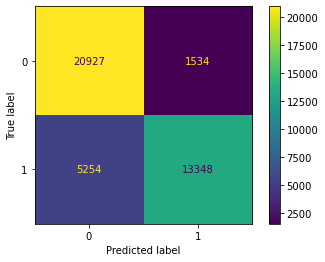

In [81]:
tree_pipe_tuned.fit(X_train, y_train)
plot_confusion_matrix(tree_pipe_tuned, X_train, y_train);

In [82]:
print("Accuracy Scores:", cross_val_score(tree_pipe_tuned, X_train, y_train))
print("Mean Accuracy:", cross_val_score(tree_pipe_tuned, X_train, y_train).mean())
"Recall Scores:", cross_validate(tree_pipe_tuned, X_train, y_train, return_train_score= True, scoring = 'recall')

Accuracy Scores: [0.77231219 0.7798612  0.77389504 0.77216269 0.76960546]
Mean Accuracy: 0.7760026383510774


('Recall Scores:',
 {'fit_time': array([0.30303288, 0.27500415, 0.31313181, 0.30099964, 0.3060267 ]),
  'score_time': array([0.03599453, 0.04499125, 0.03699923, 0.04300618, 0.03700089]),
  'test_score': array([0.63145161, 0.67320613, 0.66326256, 0.63360215, 0.65456989]),
  'train_score': array([0.70387045, 0.73039446, 0.73106646, 0.69553823, 0.7287327 ])})

## Tuned Model 2 - XGBoost Classifier

Trial and error tuning of parameters beginning at Search results led to the following being the most successful:

In [103]:
xgb_pipe_tuned = Pipeline(steps =[('transform', CustomTransformer()),('scaler', StandardScaler()), 
                                  ('xgb', XGBClassifier(subsample=0.9,
                                                        reg_lambda=0.1,
                                                        n_estimators=500,
                                                        min_child_weight=1.0,
                                                        max_depth=40,
                                                        learning_rate=0.3,
                                                        gamma=0.2,
                                                        eta=0.9,
                                                        colsample_bytree=0.9,
                                                        colsample_bylevel=0.5))])

#nestimators = 400, lr = .2, depth = 40, reg_lambda=1.0, 20589, 1872, 4568, 14034
#nestimators = 500, lr = .4, depth = 40, reg_lambda=1.0, 20558, 1903, 4496, 14106
#nestimators = 600, lr = .3, depth = 40, reg_lambda=1.0, 20608, 1853, 4534, 14068
#nestimators = 600, lr = .3, depth = 4,  reg_lambda=1.0, 2e+04, 2117, 5684, 12918
#nestimators = 500, lr = .3, depth = 10, reg_lambda=1.0, 20504, 1957, 4792, 13810
#nestimators = 500, lr = .3, depth = 40, reg_lambda=0.5, 20599, 1862, 4496, 14106
#nestimators = 500, lr = .3, depth = 10, reg_lambda=0.2, 20644, 1817, 4513, 14089



#nestimators = 500, lr = .3, depth = 40, reg_lambda=0.1, gamma=0.2, 20600, 1861, 4451, 14151

[16:34:18] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


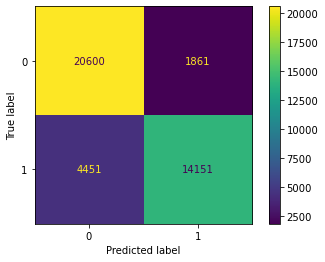

In [104]:
xgb_pipe_tuned.fit(X_train, y_train)
plot_confusion_matrix(xgb_pipe_tuned, X_train, y_train);

The recall calculations below take a little while, but they do work.  

In [105]:
print("Accuracy Scores:", cross_val_score(xgb_pipe_tuned, X_train, y_train))
print("Mean Accuracy:", cross_val_score(xgb_pipe_tuned, X_train, y_train).mean())
"Recall Scores:", cross_validate(xgb_pipe_tuned, X_train, y_train, return_train_score= True, scoring = 'recall')

[16:36:56] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:37:41] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:38:23] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:39:07] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

('Recall Scores:',
 {'fit_time': array([37.32839346, 35.51125455, 34.55315518, 34.26282048, 33.58078337]),
  'score_time': array([0.10299873, 0.11797094, 0.11300063, 0.1119709 , 0.10900092]),
  'test_score': array([0.68333333, 0.70276807, 0.69148078, 0.67768817, 0.69946237]),
  'train_score': array([0.7642118 , 0.76459915, 0.76211276, 0.76266631, 0.76824352])})

Example result:

Accuracy Scores: [0.78667965 0.79374163 0.78570559 0.78592304 0.78677545]  
Mean Accuracy: 0.7877650724093515  
('Recall Scores:',  
 {'fit_time': array([21.27556515, 20.48738503, 20.44357967, 19.84486055, 19.39542603]),  
  'score_time': array([0.21004176, 0.20481229, 0.1889286 , 0.17752552, 0.20445323]),  
  'test_score': array([0.67903226, 0.70357431, 0.68691212, 0.68494624, 0.6983871 ]),  
  'train_score': array([0.74828652, 0.749412  , 0.74826961, 0.7485553 , 0.75251982])})  

## Tuned Model 3 - Random Forest Classifier

Although the search suggested that using gini as a criterion may be a stronger choice, the model seemed to perform better using entropy and with a set maximum depth.

In [ ]:
forest_pipe_tuned = Pipeline(steps =[('transform', CustomTransformer()),('scaler', StandardScaler()),
                                     ('forest', RandomForestClassifier(n_estimators=200,
                                                                       max_features='sqrt',
                                                                       max_depth=45,
                                                                       criterion='entropy'))])

In [ ]:
forest_pipe_tuned.fit(X_train, y_train)
plot_confusion_matrix(forest_pipe_tuned, X_train, y_train);

In [ ]:
print("Accuracy Scores:", cross_val_score(forest_pipe_tuned, X_train, y_train))
print("Mean Accuracy:", cross_val_score(forest_pipe_tuned, X_train, y_train).mean())
"Recall Scores:", cross_validate(forest_pipe_tuned, X_train, y_train, return_train_score= True, scoring = 'recall')

# Test Set

### XGBoost Classifier predictions on the test set

In [ ]:
xgb_pipe_tuned.fit(X_train, y_train)

xgb_train_preds = xgb_pipe_tuned.predict(X_train)
xgb_test_preds = xgb_pipe_tuned.predict(X_test)

xgb_accuracy = accuracy_score(y_test, xgb_test_preds)
xgb_precision = precision_score(y_test, xgb_test_preds)
xgb_recall = recall_score(y_test, xgb_test_preds)

xgb_y_probas = xgb_pipe_tuned.predict_proba(X_test)[:,1]
xgb_tpr, xgb_fpr, xgb_thresholds = roc_curve(y_test, xgb_y_probas)
xgb_auc = auc(xgb_tpr, xgb_fpr)


print("XGBoost Classifier Stats:")
print("Test Accuracy: ", xgb_accuracy)
print("Test Precision: ", xgb_precision)
print("Test Recall: ", xgb_recall)

### Random Forest Classifier predictions on the test set

In [ ]:
forest_pipe_tuned.fit(X_train, y_train)

forest_train_preds = forest_pipe_tuned.predict(X_train)
forest_test_preds = forest_pipe_tuned.predict(X_test)

forest_accuracy = accuracy_score(y_test, forest_test_preds)
forest_precision = precision_score(y_test, forest_test_preds)
forest_recall = recall_score(y_test, forest_test_preds)

forest_y_probas = forest_pipe_tuned.predict_proba(X_test)[:,1]
forest_tpr, forest_fpr, forest_thresholds = roc_curve(y_test, forest_y_probas)
forest_auc = auc(forest_tpr, forest_fpr)

print("Random Forest Classifier Stats:")
print("Test Accuracy: ", forest_accuracy)
print("Test Precision: ", forest_precision)
print("Test Recall: ", forest_recall)

## Tuned Model ROC Curves against each other on Test set

In [ ]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 8))

plt.plot(xgb_tpr, xgb_fpr, color = 'b', label = 'XGBoost Classifier')
plt.plot(forest_tpr, forest_fpr, color = 'r', label = 'Random Forest Classifier')
plt.plot([0, 1], [0, 1], color = 'y', linestyle = '--')

plt.xlim([0.0, 1.05])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Model ROC Curve')
plt.legend()
plt.show()